![](img/ppgcc.png)

# Naive Bayes - Mineração de Dados

In [1]:
# imports

# datetime
import datetime

# logging
import logging

# warnings
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

# numpy
import numpy as np

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, validation_curve, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import scale, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import itertools as its
from sklearn import svm

# graphviz
import graphviz

# scipy
import scipy
from scipy.stats import ttest_rel, wilcoxon

# debug
import pdb

In [2]:
# debug
def debug(debug=False):
    if debug == True:
        pdb.set_trace()

In [3]:
# confusion matrix
def confusao(index, con_matrix, tit):
    """Plots confusionx' matrix."""
    df_cm = pd.DataFrame(con_matrix, index=index, columns=index)
    plt.figure(figsize=(8, 4))
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='.2f', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - ' + tit)
    plt.ylabel('output class')
    plt.xlabel('target class')
    plt.xticks(rotation='horizontal')
    plt.yticks(rotation='horizontal')
    plt.savefig('img/con_matrix_' + str(tit) + '.png')
    plt.show()

In [4]:
# reads csv file into pandas dataframe
sns.set()

col = ['nivel', 'etapa', 'turno', 'sexo', 'etnia', 'cond_matricula', 'responsavel', 'especial', 'transp_pub', 'status']

# csvfile
csV = '../datasets/Y2_alunos.csv'

# pandasdataframe
df = pd.read_csv(csV, usecols=col, low_memory=False)


In [5]:
# X and Y
X = df[['nivel', 'etapa', 'turno', 'sexo', 'etnia', 'cond_matricula', 'responsavel', 'especial', 'transp_pub']]
Y = df['status']

# split data
size = 0.41
state = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)

In [6]:
# nb fit
nb = GaussianNB()
nb.fit(X_train, Y_train)
predNB = nb.predict(X_test)

In [7]:
# accuracy score
accuNB = accuracy_score(Y_test, predNB)
print("Accuracy: ","{:10.2f}".format(accuNB))

Accuracy:        0.59


In [8]:
# classification report
class_report = classification_report(Y_test, predNB)
print(class_report)

             precision    recall  f1-score   support

          0       0.57      0.82      0.67       605
          1       0.64      0.34      0.45       576

avg / total       0.61      0.59      0.56      1181



In [9]:
# confusion matrix
con_matNB = confusion_matrix(Y_test, predNB)
print(con_matNB)

[[496 109]
 [378 198]]


Confusion Matrix - Naive Bayes


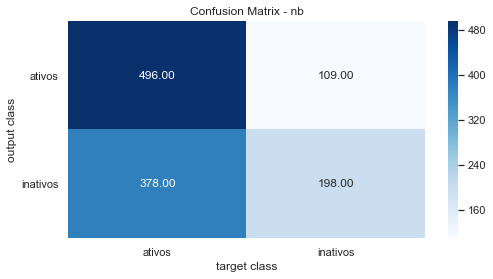

In [10]:
# plot confusion matrix
bla = ['ativos', 'inativos']
print("Confusion Matrix - Naive Bayes")
confusao(bla, con_matNB, 'nb')

Confusion Matrix Normalized - Naive Bayes


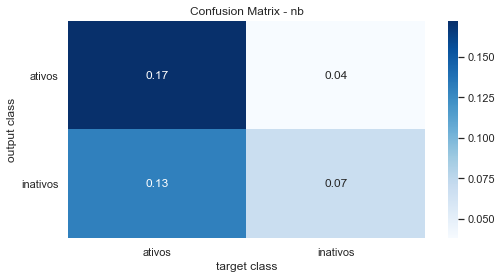

In [11]:
# plot confusion matrix
bla = ['ativos', 'inativos']
print("Confusion Matrix Normalized - Naive Bayes")
confusao(bla, con_matNB / 2880, 'nb')

In [12]:
# scores roc curve
scorRocNB = nb.predict_proba(X_test)[:, 1]

# roc
fprNB, tprNB, _ = roc_curve(Y_test, scorRocNB)

# auc
aucNB = auc(fprNB, tprNB)

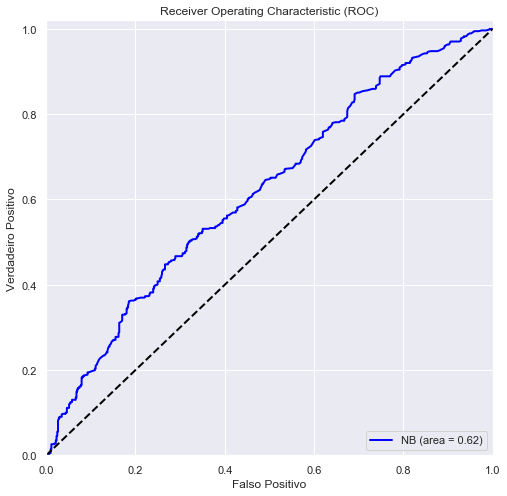

In [13]:
# plot roc curve
plt.figure(figsize=(8, 8))
plt.plot(fprNB, tprNB, color='blue', lw=2, label='NB (area = %0.2f)' % aucNB)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('img/curva_roc-nb.png')
plt.show()
